In [ ]:
import numpy as np

import gym

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
env = gym.make('Taxi-v3')

NUM_STATES = env.observation_space.n
NUM_ACTIONS = env.action_space.n

print('States: {}'.format(NUM_STATES))
print('Actions: {}'.format(NUM_ACTIONS))

States: 500
Actions: 6


In [ ]:
lr = 0.8 
gamma = 0.6 

NUM_EPISODES = 500 
MAX_STEPS = 100 

In [ ]:
pathLenList = []
totalRewardList = [] 

Q = np.random.rand(NUM_STATES, NUM_ACTIONS)

for i in range(NUM_EPISODES):
    
    s = env.reset()

    penalties = 0
    totalReward = 0
    step = 0
    done = False

    while not done:
        
        a = np.argmax(Q[s,:])
        
        s1, r, done, _ = env.step(a)
        
        if r == -10:
            penalties += 1

        if done:
            Q_target = r
        else:
            Q_target = r + gamma * np.max(Q[s1,:])
            
        Q[s,a] = (1-lr) * Q[s,a] + lr * Q_target
        
        totalReward += r
        s = s1
        
        if done:
            break
            
    pathLenList.append(step)
    totalRewardList.append(totalReward)
    print('Episode {}: Total reward = {}'.format(i, totalReward))        

Episode 0: Total reward = -623
Episode 1: Total reward = -605
Episode 2: Total reward = -578
Episode 3: Total reward = -695
Episode 4: Total reward = -614
Episode 5: Total reward = -632
Episode 6: Total reward = -587
Episode 7: Total reward = -623
Episode 8: Total reward = -497
Episode 9: Total reward = -308
Episode 10: Total reward = -542
Episode 11: Total reward = -175
Episode 12: Total reward = -425
Episode 13: Total reward = -185
Episode 14: Total reward = -560
Episode 15: Total reward = -272
Episode 16: Total reward = -200
Episode 17: Total reward = -191
Episode 18: Total reward = -335
Episode 19: Total reward = -560
Episode 20: Total reward = -236
Episode 21: Total reward = -218
Episode 22: Total reward = -182
Episode 23: Total reward = -24
Episode 24: Total reward = -290
Episode 25: Total reward = -308
Episode 26: Total reward = -506
Episode 27: Total reward = -139
Episode 28: Total reward = -623
Episode 29: Total reward = -200
Episode 30: Total reward = -200
Episode 31: Total r

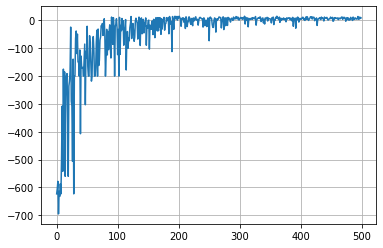

In [ ]:
plt.plot(totalRewardList)
plt.grid()

### Запуск симуляции

In [ ]:
totalReward = 0
s = env.reset()

for _ in range(100):
    env.render()
    a = np.argmax(Q[s,:])
    s, r, done, _ = env.step(a)
    totalReward += r
    if done:
        env.render()        
        break

env.close()
print('Total reward = {}'.format(totalReward))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: 